<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

**Student: Emily Nilson**

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import csv
# from collections import namedtuple   # Convenient to store the data rows
# DATA_FILE = './data/chipotle.tsv'

In [2]:
# using chipotle_df as the dataframe name instead of file_nested_list since I'm using pandas

chipotle_df = pd.read_csv('./data/chipotle.tsv', sep='\t')

chipotle_df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [3]:
# file is already separated into header and data since it was imported as a pandas dataframe

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [4]:
# inspect data to determine how QUANTITY column relates to item price column
# select one item that would have a standard set price (e.g., a can of soda) without add-on options 
# compare quantity and item_price
# can clearly see 1 canned soda costs $1.09 and 2 canned sodas costs 2 * $1.09 = $2.18
# therefore, item price is the TOTAL price for that type of item in each order

canned_soda = chipotle_df.loc[:, 'item_name'] == 'Canned Soda'
chipotle_df.loc[canned_soda, :].head() 

,order_id,quantity,item_name,choice_description,item_price
18,9,2,Canned Soda,[Sprite],$2.18
28,14,1,Canned Soda,[Dr. Pepper],$1.09
51,23,2,Canned Soda,[Mountain Dew],$2.18
53,24,1,Canned Soda,[Sprite],$1.09
107,47,1,Canned Soda,[Dr. Pepper],$1.09


In [5]:
# check column types
chipotle_df.dtypes

# item_price is object, need to convert to float

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [6]:
# remove $ sign, change to float
chipotle_df.loc[:, 'item_price'] = chipotle_df.loc[:, 'item_price'].str.replace('$','')
chipotle_df.loc[:, 'item_price'] = chipotle_df.loc[:, 'item_price'].astype('float')

# verify column changed to float
chipotle_df.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [7]:
# group by order id and take the sum of the item prices for each order
total_by_order = chipotle_df.groupby('order_id')['item_price'].sum()

# calculate the average
print('Average price of an order = $', total_by_order.mean())

Average price of an order = $ 18.81142857142869


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [8]:
# call value counts to list unique items to scan through for soda-related items
chipotle_df.loc[:, 'item_name'].value_counts()

# soda-related items: 'Canned Soft Drink', 'Canned Soda', '6 Pack Soft Drink' 
# ignore: 'Bottled Water', 'Nantucket Nectar', 'Izze'

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [9]:
unique_sodas = chipotle_df.loc[chipotle_df.loc[:, 'item_name'].isin(
    ['Canned Soft Drink', 'Canned Soda', '6 Pack Soft Drink']), 
    'choice_description'].value_counts().index.tolist()

unique_sodas

['[Diet Coke]',
 '[Coke]',
 '[Sprite]',
 '[Lemonade]',
 '[Coca Cola]',
 '[Nestea]',
 '[Dr. Pepper]',
 '[Mountain Dew]',
 '[Diet Dr. Pepper]']

In [10]:
# I'm so excited that worked. But very curious if there's a better way...

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [11]:
# first we'll figure out which types of burritos are in the data set, based on what we found in Part 4
# burrito types = chicken, steak, veggie, barbacoa, carnitas
burritos = chipotle_df.loc[chipotle_df.loc[:, 'item_name'].isin(
    ['Chicken Burrito', 'Steak Burrito', 'Veggie Burrito', 
     'Barbacoa Burrito','Carnitas Burrito']), :]

burritos.head()

,order_id,quantity,item_name,choice_description,item_price
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99


In [12]:
burritos.loc[:, 'choice_description'].describe()

# there are 1166 rows, therefore 1166 orders of burritos

count                                                  1166
unique                                                  567
top       [Fresh Tomato Salsa (Mild), [Pinto Beans, Rice...
freq                                                     24
Name: choice_description, dtype: object

In [13]:
# separate individual toppings by splitting by ","
toppings = burritos.loc[:, 'choice_description'].str.split(',', expand=True)
toppings.head()

,0,1,2,3,4,5,6,7,8,9
7,[Tomatillo Red Chili Salsa,[Fajita Vegetables,Black Beans,Pinto Beans,Cheese,Sour Cream,Guacamole,Lettuce]],None,None
9,[Fresh Tomato Salsa,[Rice,Black Beans,Pinto Beans,Cheese,Sour Cream,Lettuce]],None,None,None
16,[Tomatillo-Green Chili Salsa (Medium),[Pinto Beans,Cheese,Sour Cream]],None,None,None,None,None,None
17,[Fresh Tomato Salsa (Mild),[Black Beans,Rice,Cheese,Sour Cream,Lettuce]],None,None,None,None
21,[[Fresh Tomato Salsa (Mild),Tomatillo-Green Chili Salsa (Medium),Tomatillo-Red Chili Salsa (Hot)],[Rice,Cheese,Sour Cream,Lettuce]],None,None,None


In [14]:
total_toppings = toppings.loc[:].count().sum()
print('Total toppings in data set =', total_toppings)

Total toppings in data set = 6288


In [15]:
# recall we found out above there were 1166 burrito orders
print('Average number of toppings per burrito =', total_toppings / 1166)

Average number of toppings per burrito = 5.392795883361921


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [16]:
from collections import OrderedDict, defaultdict

chips = chipotle_df.loc[chipotle_df.loc[:, 'item_name'].str.contains('chips', case=False)]

chips.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
6,3,1,Side of Chips,NaN,1.69
10,5,1,Chips and Guacamole,NaN,4.45
14,7,1,Chips and Guacamole,NaN,4.45


In [17]:
chips_totals = chips.groupby('item_name')['quantity'].sum()

chips_totals

item_name
Chips                                    230
Chips and Fresh Tomato Salsa             130
Chips and Guacamole                      506
Chips and Mild Fresh Tomato Salsa          1
Chips and Roasted Chili Corn Salsa        23
Chips and Roasted Chili-Corn Salsa        18
Chips and Tomatillo Green Chili Salsa     45
Chips and Tomatillo Red Chili Salsa       50
Chips and Tomatillo-Green Chili Salsa     33
Chips and Tomatillo-Red Chili Salsa       25
Side of Chips                            110
Name: quantity, dtype: int64

In [22]:
# chips.to_dict('item_name', into=OrderedDict)

# can't figure this one out

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


### What are the 15 most popular items in this data set? Represent the answer visually.

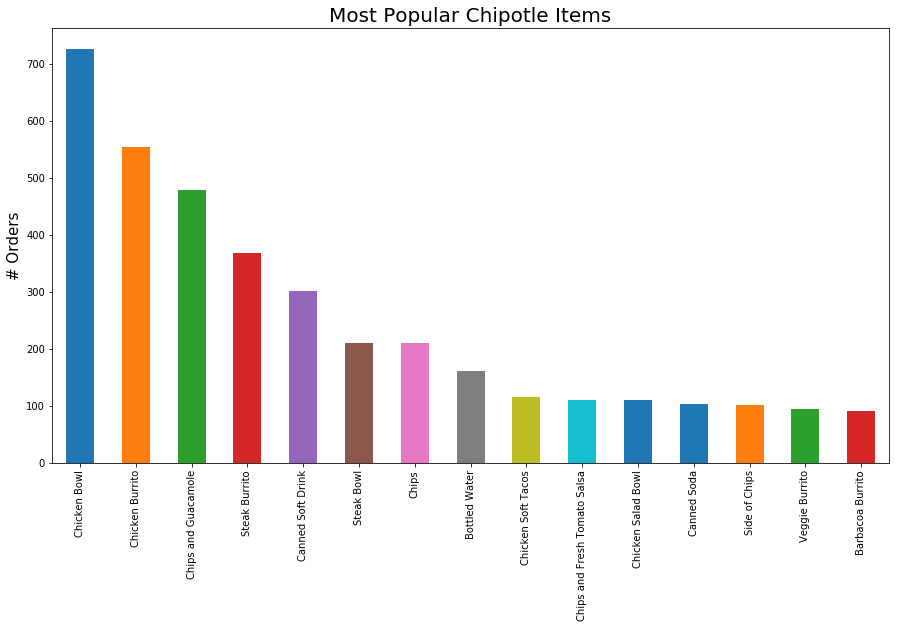

In [276]:
ax = chipotle_df.loc[:, 'item_name'].value_counts()[:15].plot(kind='bar', figsize=(15,8))
ax.set_title('Most Popular Chipotle Items', fontsize=20)
ax.set_ylabel('# Orders', fontsize=15);